In [3]:
from scipy.stats import binom

p_century = 0.1

prob = binom.cdf(2, 20, p_century)
prob

0.6769268051894659

### Probability of having 12 Up days

In [9]:
p_success = 0.5308
days = 30

prob_pmf = binom.pmf(12, 30, p_success)
prob_cdf = binom.cdf(12, 30, p_success)
print(prob_pmf)
print(prob_cdf)

0.0525529528072704
0.10521498249655906


## Probability of having 15-20 Up days

In [31]:
prob = binom.cdf(20, 30, p_success) - binom.cdf(15, 30, p_success)
prob

0.5148747760709032

In [10]:
import yfinance as yf
import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 300

#mkt_data
mkt='^NSEI'
mkt_data = yf.download(mkt, progress=False)

In [21]:
print(mkt_data['Adj Close'])
daily_returns = mkt_data['Adj Close'].pct_change().copy()
p_success = len(daily_returns[daily_returns>0]) / len(daily_returns)
print(p_success)
daily_returns.head()

Date
2007-09-17     4494.649902
2007-09-18     4546.200195
2007-09-19     4732.350098
2007-09-20     4747.549805
2007-09-21     4837.549805
                  ...     
2021-11-12    18102.750000
2021-11-15    18109.449219
2021-11-16    17999.199219
2021-11-17    17898.650391
2021-11-18    17764.800781
Name: Adj Close, Length: 3462, dtype: float64
0.5300404390525708


Date
2007-09-17         NaN
2007-09-18    0.011469
2007-09-19    0.040946
2007-09-20    0.003212
2007-09-21    0.018957
Name: Adj Close, dtype: float64

In [18]:
events = pd.Series([0]*len(daily_returns), index = daily_returns.index)
print(events.head())
events[daily_returns>0] = 1
events

Date
2007-09-17    0
2007-09-18    0
2007-09-19    0
2007-09-20    0
2007-09-21    0
dtype: int64


Date
2007-09-17    0
2007-09-18    1
2007-09-19    1
2007-09-20    1
2007-09-21    1
             ..
2021-11-12    1
2021-11-15    1
2021-11-16    0
2021-11-17    0
2021-11-18    0
Length: 3462, dtype: int64

In [22]:
n=30
occ_ndays=events.rolling(n).sum()
occ_ndays.dropna(inplace=True)
len(occ_ndays[occ_ndays==12])

172

<AxesSubplot:xlabel='Date'>

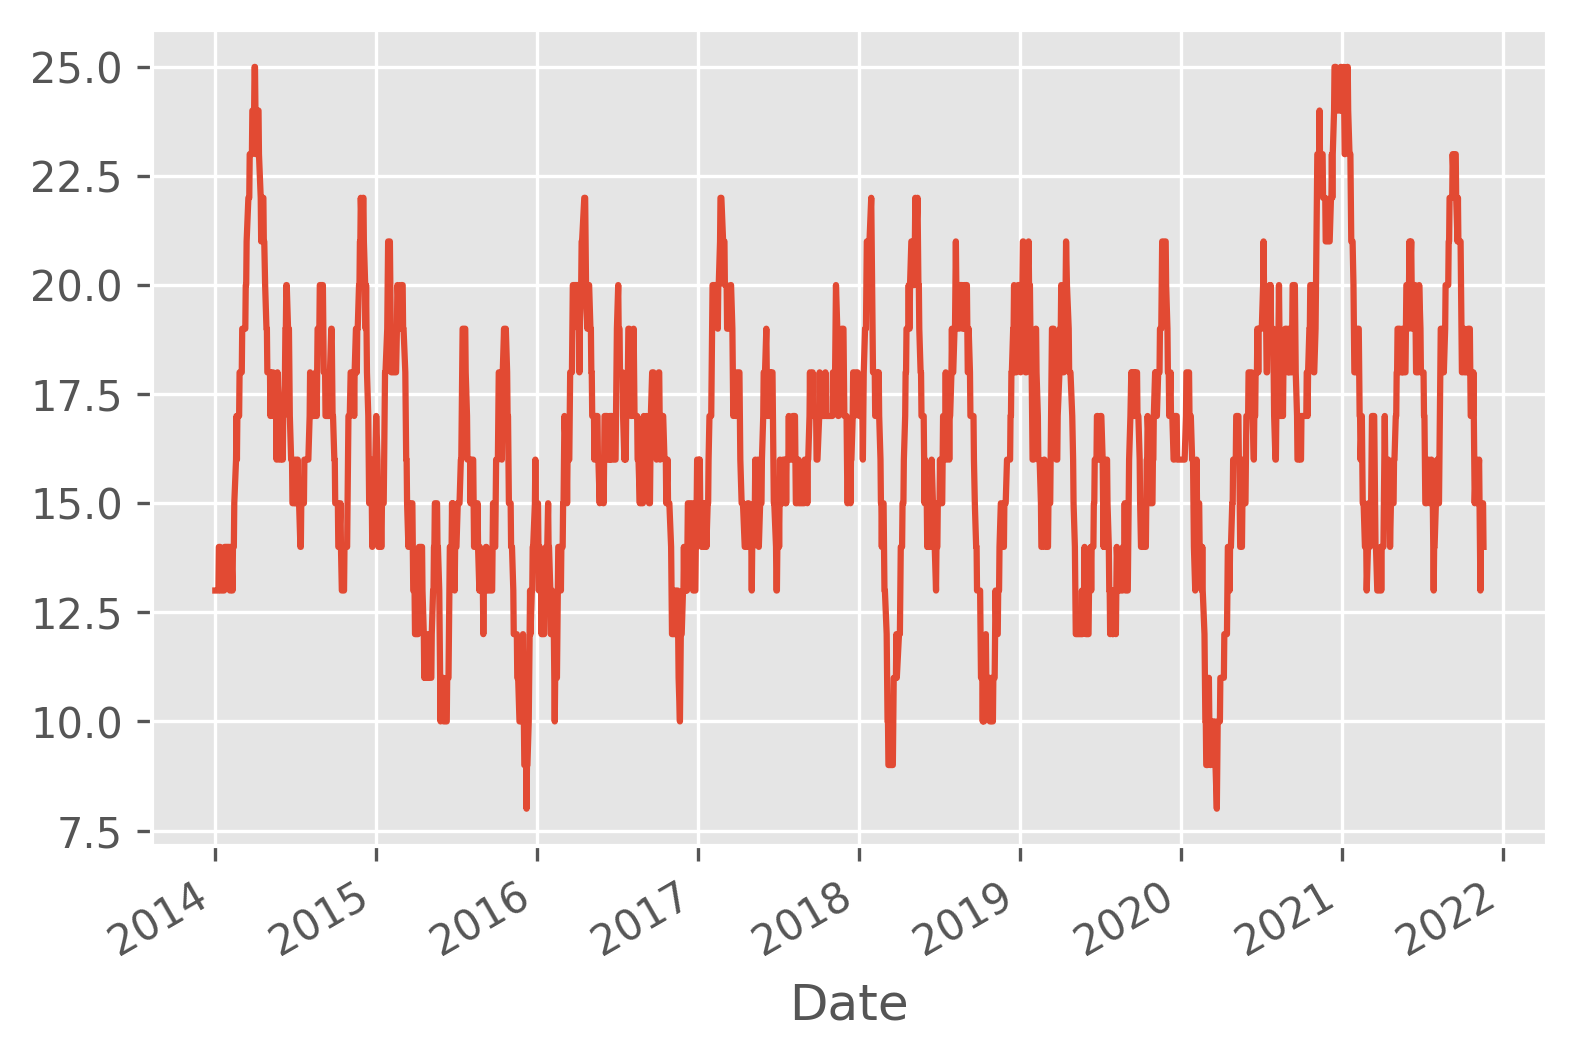

In [29]:
occ_ndays.loc['2014':'2021'].plot()